In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('data.xls')

In [3]:
df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
employee_id             54808 non-null int64
department              54808 non-null object
region                  54808 non-null object
education               52399 non-null object
gender                  54808 non-null object
recruitment_channel     54808 non-null object
no_of_trainings         54808 non-null int64
age                     54808 non-null int64
previous_year_rating    50684 non-null float64
length_of_service       54808 non-null int64
KPIs_met >80%           54808 non-null int64
awards_won?             54808 non-null int64
avg_training_score      54808 non-null int64
is_promoted             54808 non-null int64
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


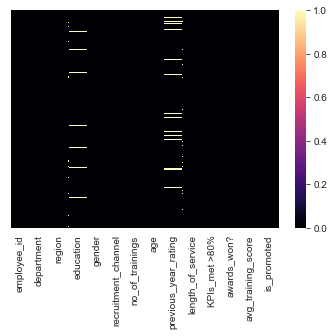

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cmap='magma')

In [6]:
test_data=df[df.isnull().any(axis=1)]

In [7]:
test_data.reset_index(inplace=True)

In [8]:
test_data.head()

,index,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,10,29934,Technology,region_23,NaN,m,sourcing,1,30,NaN,1,0,0,77,0
1,21,33332,Operations,region_15,NaN,m,sourcing,1,41,4.0,11,0,0,57,0
2,23,71177,Procurement,region_5,Bachelor's,m,other,1,27,NaN,1,0,0,70,0
3,29,74759,Sales & Marketing,region_4,Bachelor's,m,sourcing,1,26,NaN,1,0,0,44,0
4,32,35465,Sales & Marketing,region_7,NaN,f,sourcing,1,24,1.0,2,0,0,48,0


In [9]:
df.dropna(inplace=True)
df.reset_index(inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48660 entries, 0 to 48659
Data columns (total 15 columns):
index                   48660 non-null int64
employee_id             48660 non-null int64
department              48660 non-null object
region                  48660 non-null object
education               48660 non-null object
gender                  48660 non-null object
recruitment_channel     48660 non-null object
no_of_trainings         48660 non-null int64
age                     48660 non-null int64
previous_year_rating    48660 non-null float64
length_of_service       48660 non-null int64
KPIs_met >80%           48660 non-null int64
awards_won?             48660 non-null int64
avg_training_score      48660 non-null int64
is_promoted             48660 non-null int64
dtypes: float64(1), int64(9), object(5)
memory usage: 5.6+ MB


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

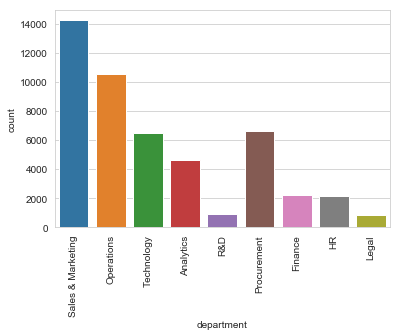

In [11]:
sns.countplot('department',data=df)
plt.xticks(rotation=90)

(array([0, 1, 2]), <a list of 3 Text xticklabel objects>)

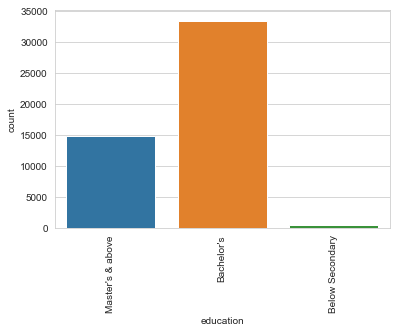

In [12]:
sns.countplot('education',data=df)
plt.xticks(rotation=90)

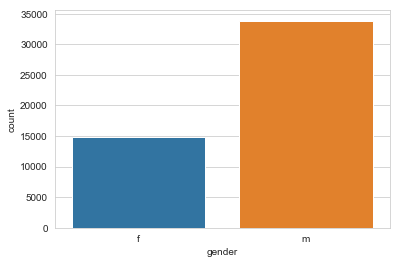

In [13]:
sns.countplot('gender',data=df)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]),
 <a list of 34 Text xticklabel objects>)

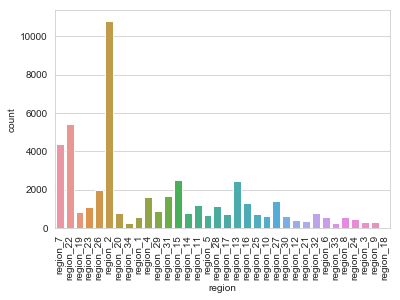

In [14]:
sns.countplot('region',data=df)
plt.xticks(rotation=90)

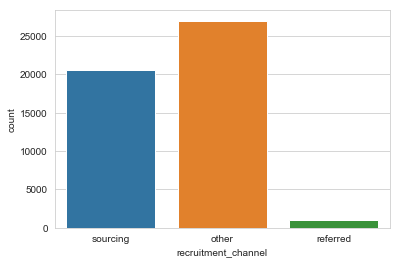

In [15]:
sns.countplot('recruitment_channel',data=df)


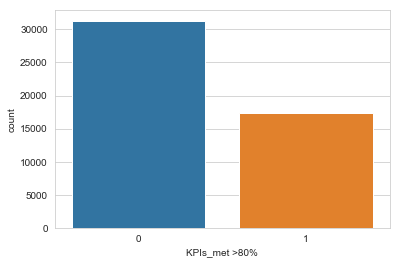

In [16]:
sns.countplot('KPIs_met >80%',data=df)

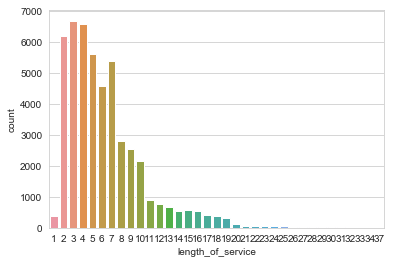

In [17]:
sns.countplot('length_of_service',data=df)

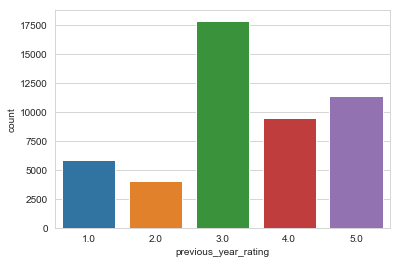

In [18]:
sns.countplot('previous_year_rating',data=df)

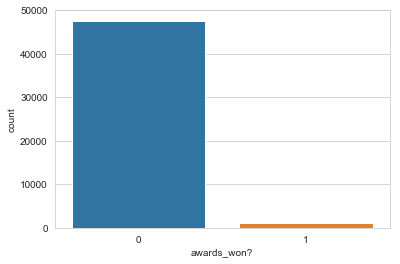

In [20]:
sns.countplot('awards_won?',data=df)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

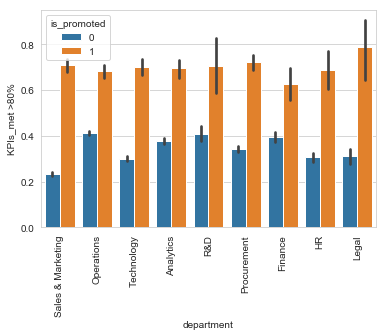

In [23]:
sns.barplot('department','KPIs_met >80%',hue='is_promoted',data=df)
plt.xticks(rotation=90)

In [25]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
temp=['recruitment_channel','department','region','education','gender']
for i in temp:
    df[i]=le.fit_transform(df[i])

In [27]:
x=df.drop(['index','employee_id','is_promoted'],axis=1)
y=df['is_promoted']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=101)

In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(100)

Text(0.5, 0, 'Relative Importance')

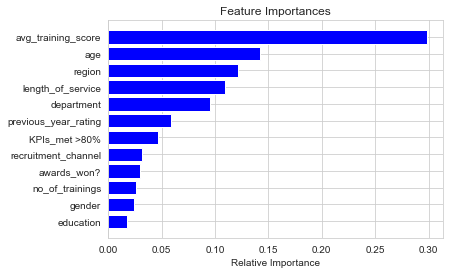

In [35]:
rfc.fit(x_train,y_train)
features=x.columns
importances = rfc.feature_importances_
indices = np.argsort(importances)
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

In [36]:
predictions=rfc.predict(x_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      8859
           1       0.80      0.27      0.41       873

   micro avg       0.93      0.93      0.93      9732
   macro avg       0.87      0.63      0.69      9732
weighted avg       0.92      0.93      0.91      9732

[[8801   58]
 [ 634  239]]
0.9288943690916563
